In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


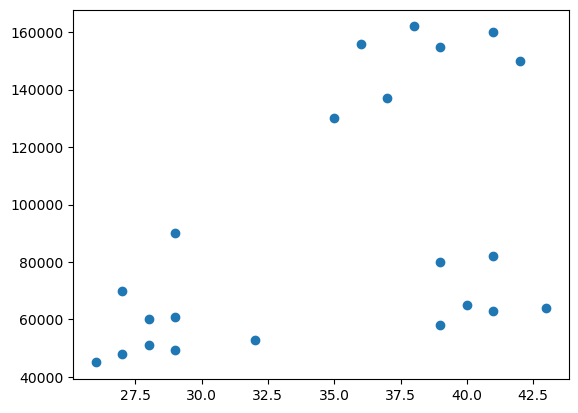

In [5]:
plt.scatter(df['Age'], df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/home/sadhin/Projects/Machine-learning-data-science/envs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


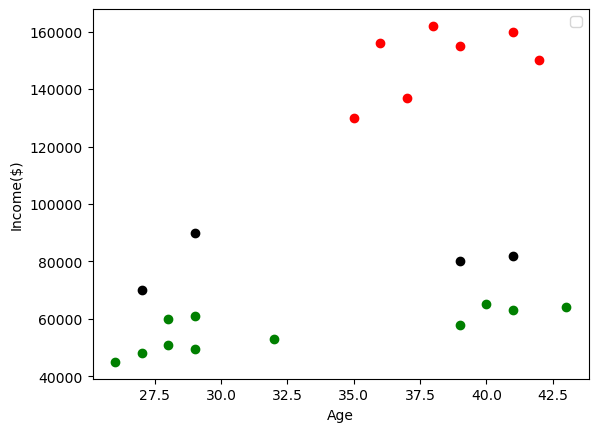

In [10]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/home/sadhin/Projects/Machine-learning-data-science/envs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [19]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

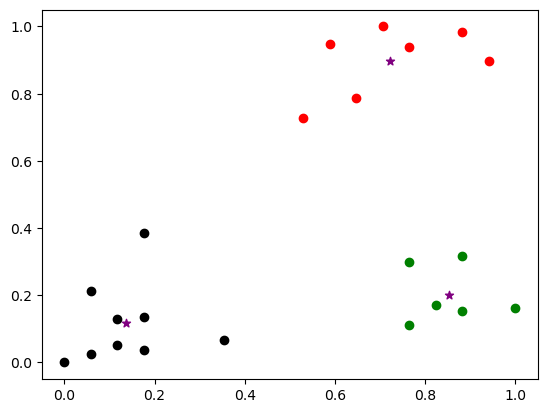

In [22]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

In [26]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [27]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553094,
 0.34910470944195643,
 0.2766936276300278,
 0.21552563314755374,
 0.18197011458109263,
 0.14257076249690032,
 0.1107356952741864]

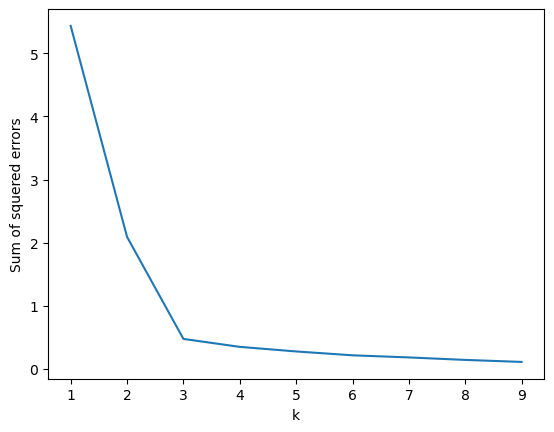

In [29]:
plt.xlabel('k')
plt.ylabel('Sum of squered errors')
plt.plot(k_rng, sse)